In [1]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Read CSV
city_data = pd.read_csv("raw_data/city_data.csv")
ride_data = pd.read_csv("raw_data/ride_data.csv")
ride_data.head()
#Merge our two data frames together
combined_ride_city = pd.merge(city_data, ride_data, how = 'left' , on=["city", "city"])
combined_ride_city.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [3]:
# Calculating the four key variables (Average Fare ($) Per City, Total Number of Rides Per City, Total Number of Drivers Per City,
#for the bubble chart:

average_fare_city = combined_ride_city.groupby('city')['fare'].mean().round(2).rename('Average Fare ($) Per City')
df_city_rides = pd.DataFrame(average_fare_city)
df_city_rides['Total Number of Rides Per City'] = combined_ride_city.groupby('city')['ride_id'].count()
df_city_rides['Total Number of Drivers Per City'] = combined_ride_city.groupby('city')['driver_count'].max()
df_city_rides['City Type'] = combined_ride_city.groupby('city')['type'].max()
df_city_rides.head()

,Average Fare ($) Per City,Total Number of Rides Per City,Total Number of Drivers Per City,City Type
city,,,,
Alvarezhaven,23.93,31,21,Urban
Alyssaberg,20.61,26,67,Urban
Anitamouth,37.32,9,16,Suburban
Antoniomouth,23.62,22,21,Urban
Aprilchester,21.98,19,49,Urban


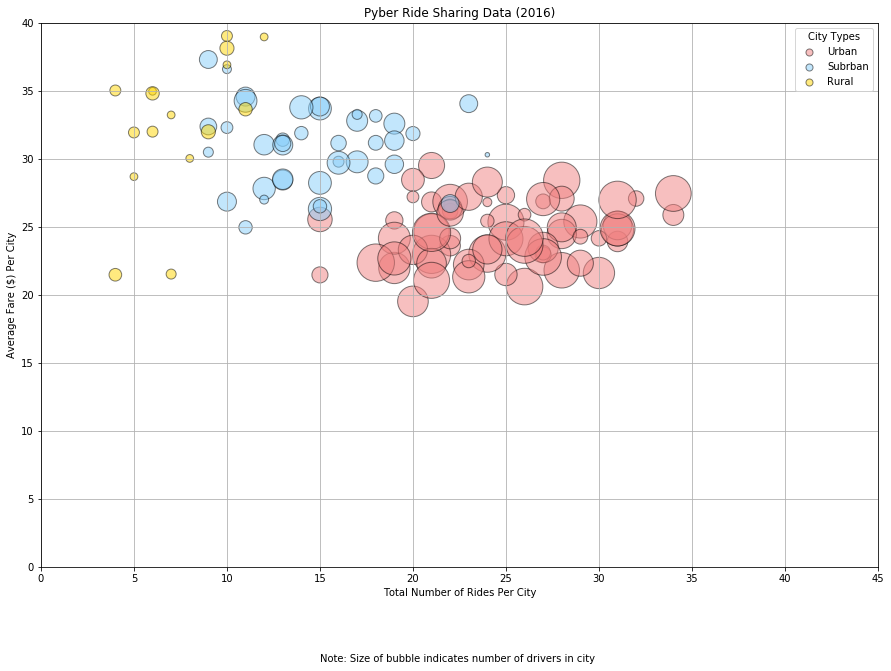

In [20]:
#Build bubble plots for each city type
urban_city_rides = df_city_rides['Total Number of Rides Per City'].loc[df_city_rides['City Type'] == "Urban"]
urban_average_fare = df_city_rides['Average Fare ($) Per City'].loc[df_city_rides['City Type'] == "Urban"]
urban_city_drivers = df_city_rides['Total Number of Drivers Per City'].loc[df_city_rides['City Type'] == "Urban"]

suburban_city_rides = df_city_rides['Total Number of Rides Per City'].loc[df_city_rides['City Type'] == "Suburban"] 
suburban_average_fare = df_city_rides['Average Fare ($) Per City'].loc[df_city_rides['City Type'] == "Suburban"]
suburban_city_drivers = df_city_rides['Total Number of Drivers Per City'].loc[df_city_rides['City Type'] == "Suburban"]

rural_city_rides = df_city_rides['Total Number of Rides Per City'].loc[df_city_rides['City Type'] == "Rural"]                                                                                                                                                                     
rural_average_fare = df_city_rides['Average Fare ($) Per City'].loc[df_city_rides['City Type'] == "Rural"]
rural_city_drivers = df_city_rides['Total Number of Drivers Per City'].loc[df_city_rides['City Type'] == "Rural"]

plt.figure(figsize= (15,10))

plt.scatter(urban_city_rides, urban_average_fare, color="lightcoral", edgecolor="black"
            , label="Urban", alpha=0.5, s=round(20*urban_city_drivers, 0), linewidths=1)

plt.scatter(suburban_city_rides, suburban_average_fare, color="lightskyblue", edgecolor="black"
            , label="Subrban", alpha=0.5, s=round(20*suburban_city_drivers, 0), linewidths=1)

plt.scatter(rural_city_rides, rural_average_fare, color="gold", edgecolor="black"
            ,label="Rural", alpha=0.5, s=round(20*rural_city_drivers, 0), linewidths=1)



plt.grid()
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides Per City")
plt.ylabel("Average Fare ($) Per City")
plt.xlim (0,45)
plt.ylim (0,40)

note = ("Note: Size of bubble indicates number of drivers in city")
plt.text (15, -7, note, wrap = True)

lgnd=plt.legend(loc="upper right", title="City Types", scatterpoints=1)
lgnd.legendHandles[0]._sizes = [50]
lgnd.legendHandles[1]._sizes = [50]
lgnd.legendHandles[2]._sizes = [50]

plt.savefig("pyber_analysis.png")
plt.show()

In [5]:
# Calculate Total Fare by city type
ride_type_grouped = combined_ride_city.groupby('type')
total_fare_type = ride_type_grouped['fare'].sum()
df_total_fare_type = pd.DataFrame(total_fare_type)
df_total_fare_type

,fare
type,
Rural,4255.09
Suburban,20335.69
Urban,40078.34


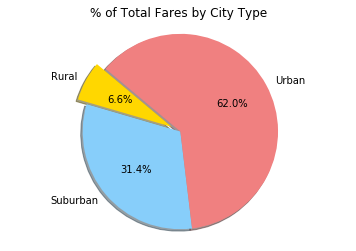

In [6]:
# Create a pie chart based upon Total Fare
explode = [0.1,0,0]
colors = ["Gold", "lightskyblue", "lightcoral"]

plt.pie(df_total_fare_type['fare'], explode=explode, labels=df_total_fare_type.index, colors=colors,
        autopct='{:.1f}%'.format, shadow=True, startangle=140)
plt.title("% of Total Fares by City Type")
plt.axis("equal")
plt.show()

In [7]:
# Calculate the total rids by city type
ride_type_grouped = combined_ride_city.groupby('type')
total_rides_type = ride_type_grouped['ride_id'].count()
df_total_rides_type = pd.DataFrame(total_rides_type)
df_total_rides_type

,ride_id
type,
Rural,125
Suburban,657
Urban,1625


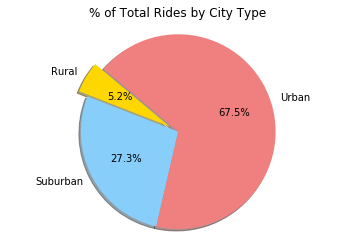

In [8]:
# Create a pie chart based upon Total Rides
explode = [0.1,0,0]
colors = ["Gold", "lightskyblue", "lightcoral"]

plt.pie(df_total_rides_type['ride_id'], explode=explode, labels=df_total_rides_type.index, colors=colors,
        autopct='{:.1f}%'.format, shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")
plt.axis("equal")
plt.show()

In [38]:
# Calculate the total drivers by city type
df_drivers_per_type = pd.DataFrame(df_city_rides.groupby('City Type')['Total Number of Drivers Per City'].sum())
df_drivers_per_type

,Total Number of Drivers Per City
City Type,
Rural,104
Suburban,635
Urban,2607


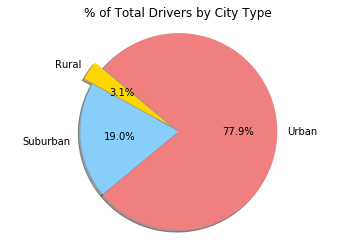

In [39]:
# Create a pie chart based upon Total Drivers
explode = [0.1,0,0]
colors = ["Gold", "lightskyblue", "lightcoral"]

plt.pie(df_drivers_per_type['Total Number of Drivers Per City'], explode=explode, labels=df_total_drivers_type.index, colors=colors,
        autopct='{:.1f}%'.format, shadow=True, startangle=140)
plt.title("% of Total Drivers by City Type")
plt.axis("equal")
plt.show()